In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from tqdm import tqdm
import time

from isingCA_local import isingCA

C:\Users\Heysoos\anaconda3\envs\torchstuff\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
CHANNELS=1 # number of channels in grid
RADIUS=1
# BETA=1/(RADIUS * RADIUS * CHANNELS)
BETA = 1/2.1
ca = isingCA(CHANNELS=CHANNELS, BETA=BETA, RADIUS=RADIUS).cuda() 

C:\Users\Heysoos\anaconda3\envs\torchstuff\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


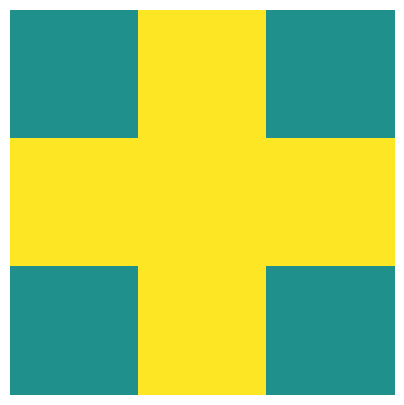

In [3]:
kernels = torch.cat([k for k in ca.rule.nearest_neighbours], dim=0).cpu().detach().numpy()
# kernels = totalistic(ca.rule.kernels[0].cpu().detach()).numpy()

num_plot_kernels = np.min([6, CHANNELS])
fig, axes = plt.subplots(1, num_plot_kernels, figsize=(5, 5))

if CHANNELS == 1:
    kplot = kernels[0, :, :]
    kmax = np.max(np.abs(kplot))
    axes.imshow(kplot, vmin=-kmax, vmax=kmax)
    axes.axis('off')
    
else:
    for j in range(num_plot_kernels):
        kplot = kernels[j, :, :]
        kmax = np.max(np.abs(kplot))
        axes[j].imshow(kplot, vmin=-kmax, vmax=kmax)
        axes[j].axis('off')

In [64]:
sizes = [int(i) for i in np.linspace(10, 3500, 10)]
print(sizes)

def time_model(model, sizes):
    res = []
    for RES in sizes:

        state = model.initGrid((RES, RES))

        t_start = time.time()
        for i in range(200):
            state = model.forward(state)
        t_end = time.time()
    
        elapsed_time = t_end - t_start
        res.append(elapsed_time)
    return res

[10, 397, 785, 1173, 1561, 1948, 2336, 2724, 3112, 3500]


In [71]:
ca.rule.temp_adapt = False
res = time_model(ca, sizes)

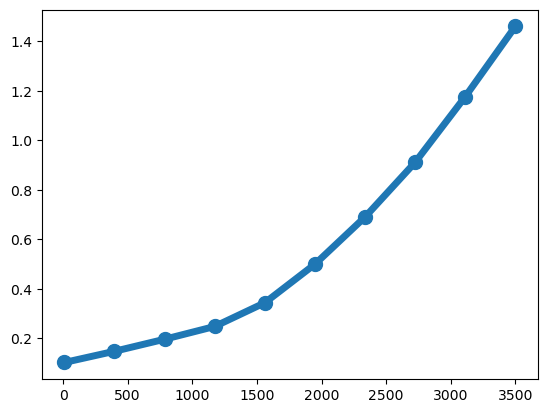

In [72]:
plt.plot(sizes, res, '-o', lw=5, ms=10)

In [73]:
ca.rule.temp_adapt = True
res_adapt = time_model(ca, sizes)

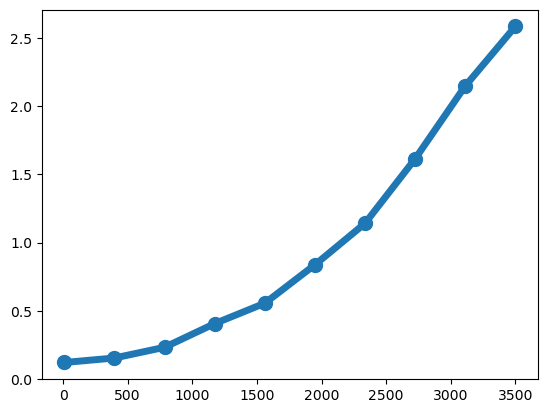

In [74]:
plt.plot(sizes, res_adapt, '-o', lw=5, ms=10)

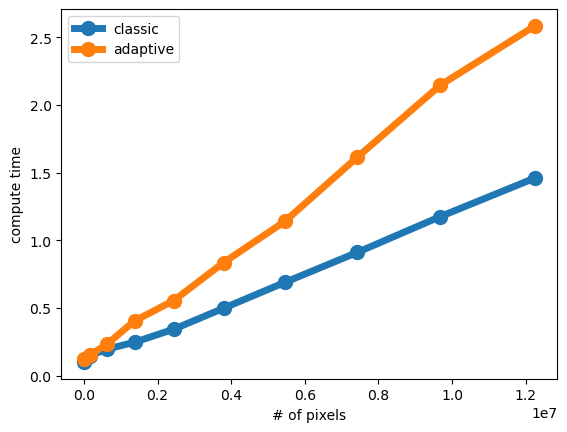

In [79]:
n_pixels = [s ** 2 for s in sizes]
plt.plot(n_pixels, res, '-o', lw=5, ms=10, label='classic')
plt.plot(n_pixels, res_adapt, '-o', lw=5, ms=10, label='adaptive')
plt.xlabel('# of pixels')
plt.ylabel('compute time')
plt.legend()


In [110]:
del state

In [15]:
def time_rnn(sizes):
    res = []
    for s in sizes:
        rnn = torch.nn.RNN(1, s).cuda()
        input = torch.zeros(10000, 1).cuda()
        
        t_start = time.time()
        
        rnn.forward(input)
        
        t_end = time.time()    
        elapsed_time = t_end - t_start
        res.append(elapsed_time)
    return res

In [16]:
rnn_sizes = [10, 50, 100, 200, 500, 1000, 5000, 10000]
res_rnn = time_rnn(sizes=rnn_sizes)

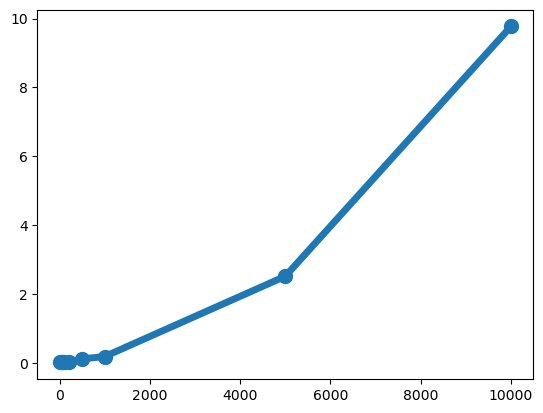

In [17]:
plt.plot(rnn_sizes, res_rnn, '-o', lw=5, ms=10, label='rnn')

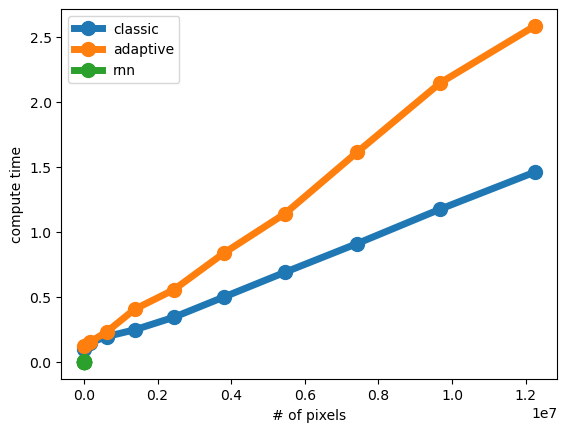

In [121]:
n_pixels = [s ** 2 for s in sizes]
plt.plot(n_pixels, res, '-o', lw=5, ms=10, label='classic')
plt.plot(n_pixels, res_adapt, '-o', lw=5, ms=10, label='adaptive')
plt.plot(sizes, res_rnn, '-o', lw=5, ms=10, label='rnn')
plt.xlabel('# of pixels')
plt.ylabel('compute time')
plt.legend()
